# Avacado Project

Name: Vaibhav Tayade
contact: 8087970061
Email id: vaibhav_t29@rediffmail.com

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# IMPORTING DATASET:

In [2]:
# Importing dataset and creating dataframe:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# converting column 'date' from string data to date type data.

df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [4]:
print(df['Date'].dtypes)

datetime64[ns]


In [5]:
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'day', 'month'],
      dtype='object')

In [7]:
# rearranging dataset:

df_n = df[['day', 'month','year','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region','AveragePrice']]

In [8]:
df_n.describe()

,day,month,year,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,AveragePrice
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,15.662612,6.177215,2016.147899,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,1.405978
std,8.776281,3.534130,0.939938,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.402677
min,1.000000,1.000000,2015.000000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.440000
25%,8.000000,3.000000,2015.000000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,1.100000
50%,16.000000,6.000000,2016.000000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,1.370000
75%,23.000000,9.000000,2017.000000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.660000
max,31.000000,12.000000,2018.000000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,3.250000


Observation:
    From the above describtion of the dataframe, we can say that there are few columns like 'LargeBags' and 'XLarge Bags' where Mean is higher than the Median, which indicates presence of outliers and skewness in the dataset, but there may be few more columns which also can have outliers and skewness we can find out that later using boxplot and distplot.

In [9]:
df_n.isnull().sum()

day             0
month           0
year            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
AveragePrice    0
dtype: int64

# ENCODING THE CATEGORICAL DATA:

In [10]:
LE = LabelEncoder()
df_n['type'] = LE.fit_transform(df_n['type'])
df_n['region'] = LE.fit_transform(df_n['region'])


# CHECKING OUTLIERS USING BOXPLOT:

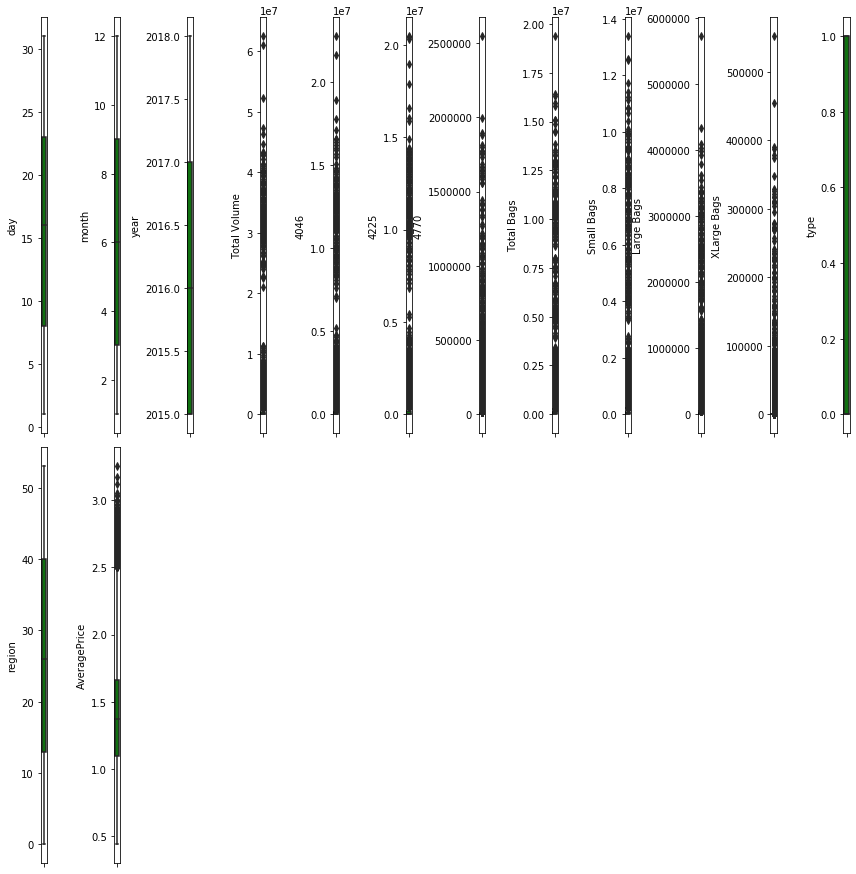

In [11]:
column_list = df_n.columns.values
ncol=12
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(0, len(column_list)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df_n[column_list[i]],color='green',orient='v')
    plt.tight_layout()

OBSERVATION:

We can easily find out from the above boxplot, the presence of outliers in the columns like TotalVolume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, Average Price.

# CHECKING SKEWNESS USING DISTPLOT:

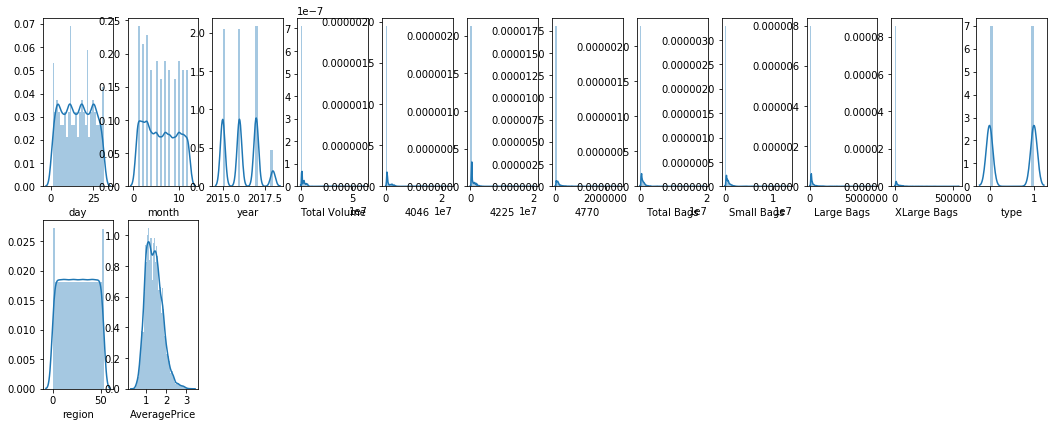

In [12]:
collist = df_n.columns.values
ncol = 12
nrows = 5


plt.figure(figsize=(18, 18))

for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.distplot(df_n[collist[i]])

OBSERVATION:

We can see from the above distplot of the datasets, data is not evenly distributed and there are presence of skewness in the datasets.

# BIVARIATE ANALYSIS:

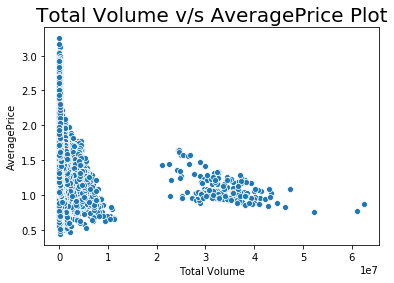

In [13]:
# scatter plot - 1 >>>

plt.title('Total Volume v/s AveragePrice Plot', fontsize = 20)
sns.scatterplot(df['Total Volume'], df['AveragePrice'])

Observation:
    We can see that from the above scatter plot, less the volume of avocado higher the price, and higher the volumer less the price.

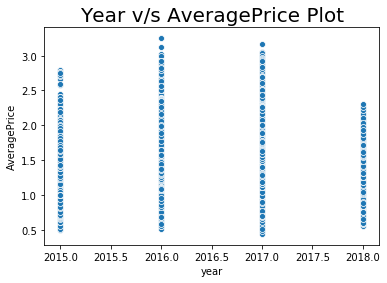

In [14]:
plt.title('Year v/s AveragePrice Plot', fontsize = 20)
sns.scatterplot(df['year'], df['AveragePrice'])

Observation:
    From the above scatter plot, we can see that 2016 and 2017 year's avocado are having higher prices, and 2018 year's avocado having least price.

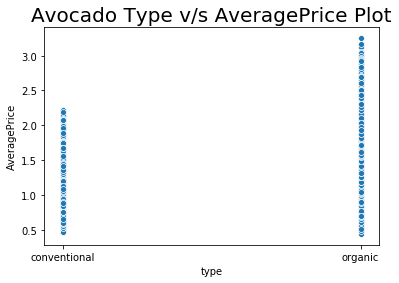

In [15]:

plt.title('Avocado Type v/s AveragePrice Plot', fontsize = 20)
sns.scatterplot(df['type'], df['AveragePrice'])

OBSERVATION:
    Organic type Avocado are the ones having higher Average price compared to Conventional type Avocado.

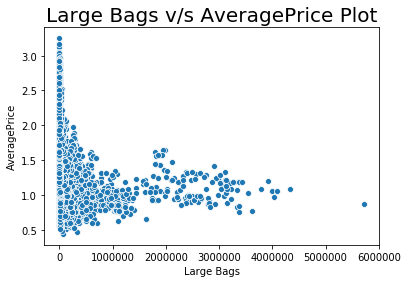

In [16]:
plt.title('Large Bags v/s AveragePrice Plot', fontsize = 20)
sns.scatterplot(df['Large Bags'], df['AveragePrice'])

Observation: Lesser the value of LargeBags higher the Average Price of avocado.

# CHECKING CORRELATION MATRIX OF DATASET:

In [17]:
# checking correlation of the dataset.
dfcor = df_n.corr()
dfcor

,day,month,year,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
day,1.000000,0.010621,0.004475,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.003870,-0.008352,0.000319,-0.000013,-0.000021,0.027386
month,0.010621,1.000000,-0.177050,-0.024689,-0.025803,-0.022108,-0.033424,-0.022724,-0.023126,-0.020187,-0.012969,-0.000085,-0.000144,0.162409
year,0.004475,-0.177050,1.000000,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,-0.000032,-0.000055,0.093197
Total Volume,-0.009747,-0.024689,0.017193,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,-0.192752
4046,-0.010159,-0.025803,0.003353,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,-0.208317
4225,-0.012393,-0.022108,-0.009559,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.172928
4770,-0.009009,-0.033424,-0.036531,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.179446
Total Bags,-0.004988,-0.022724,0.071552,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,-0.177088
Small Bags,-0.003870,-0.023126,0.063915,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,-0.174730
Large Bags,-0.008352,-0.020187,0.087891,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,-0.172940


UNDERSTANDING CORRELATION MATRIX USING HEATMAP:

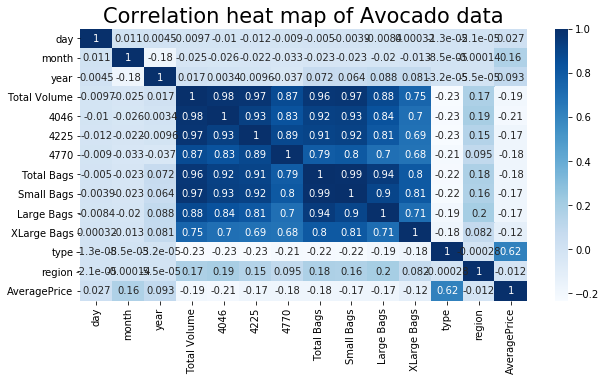

In [18]:
plt.figure(figsize=(10,5))
plt.title('Correlation heat map of Avocado data', fontsize = 21)

sns.heatmap(dfcor,cmap='Blues', annot=True)

Observation:
    
    Most of the columns are negatively correlated with the AveragePrice column like, TotalVolume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags.

# Checking pair plot of dataframe:

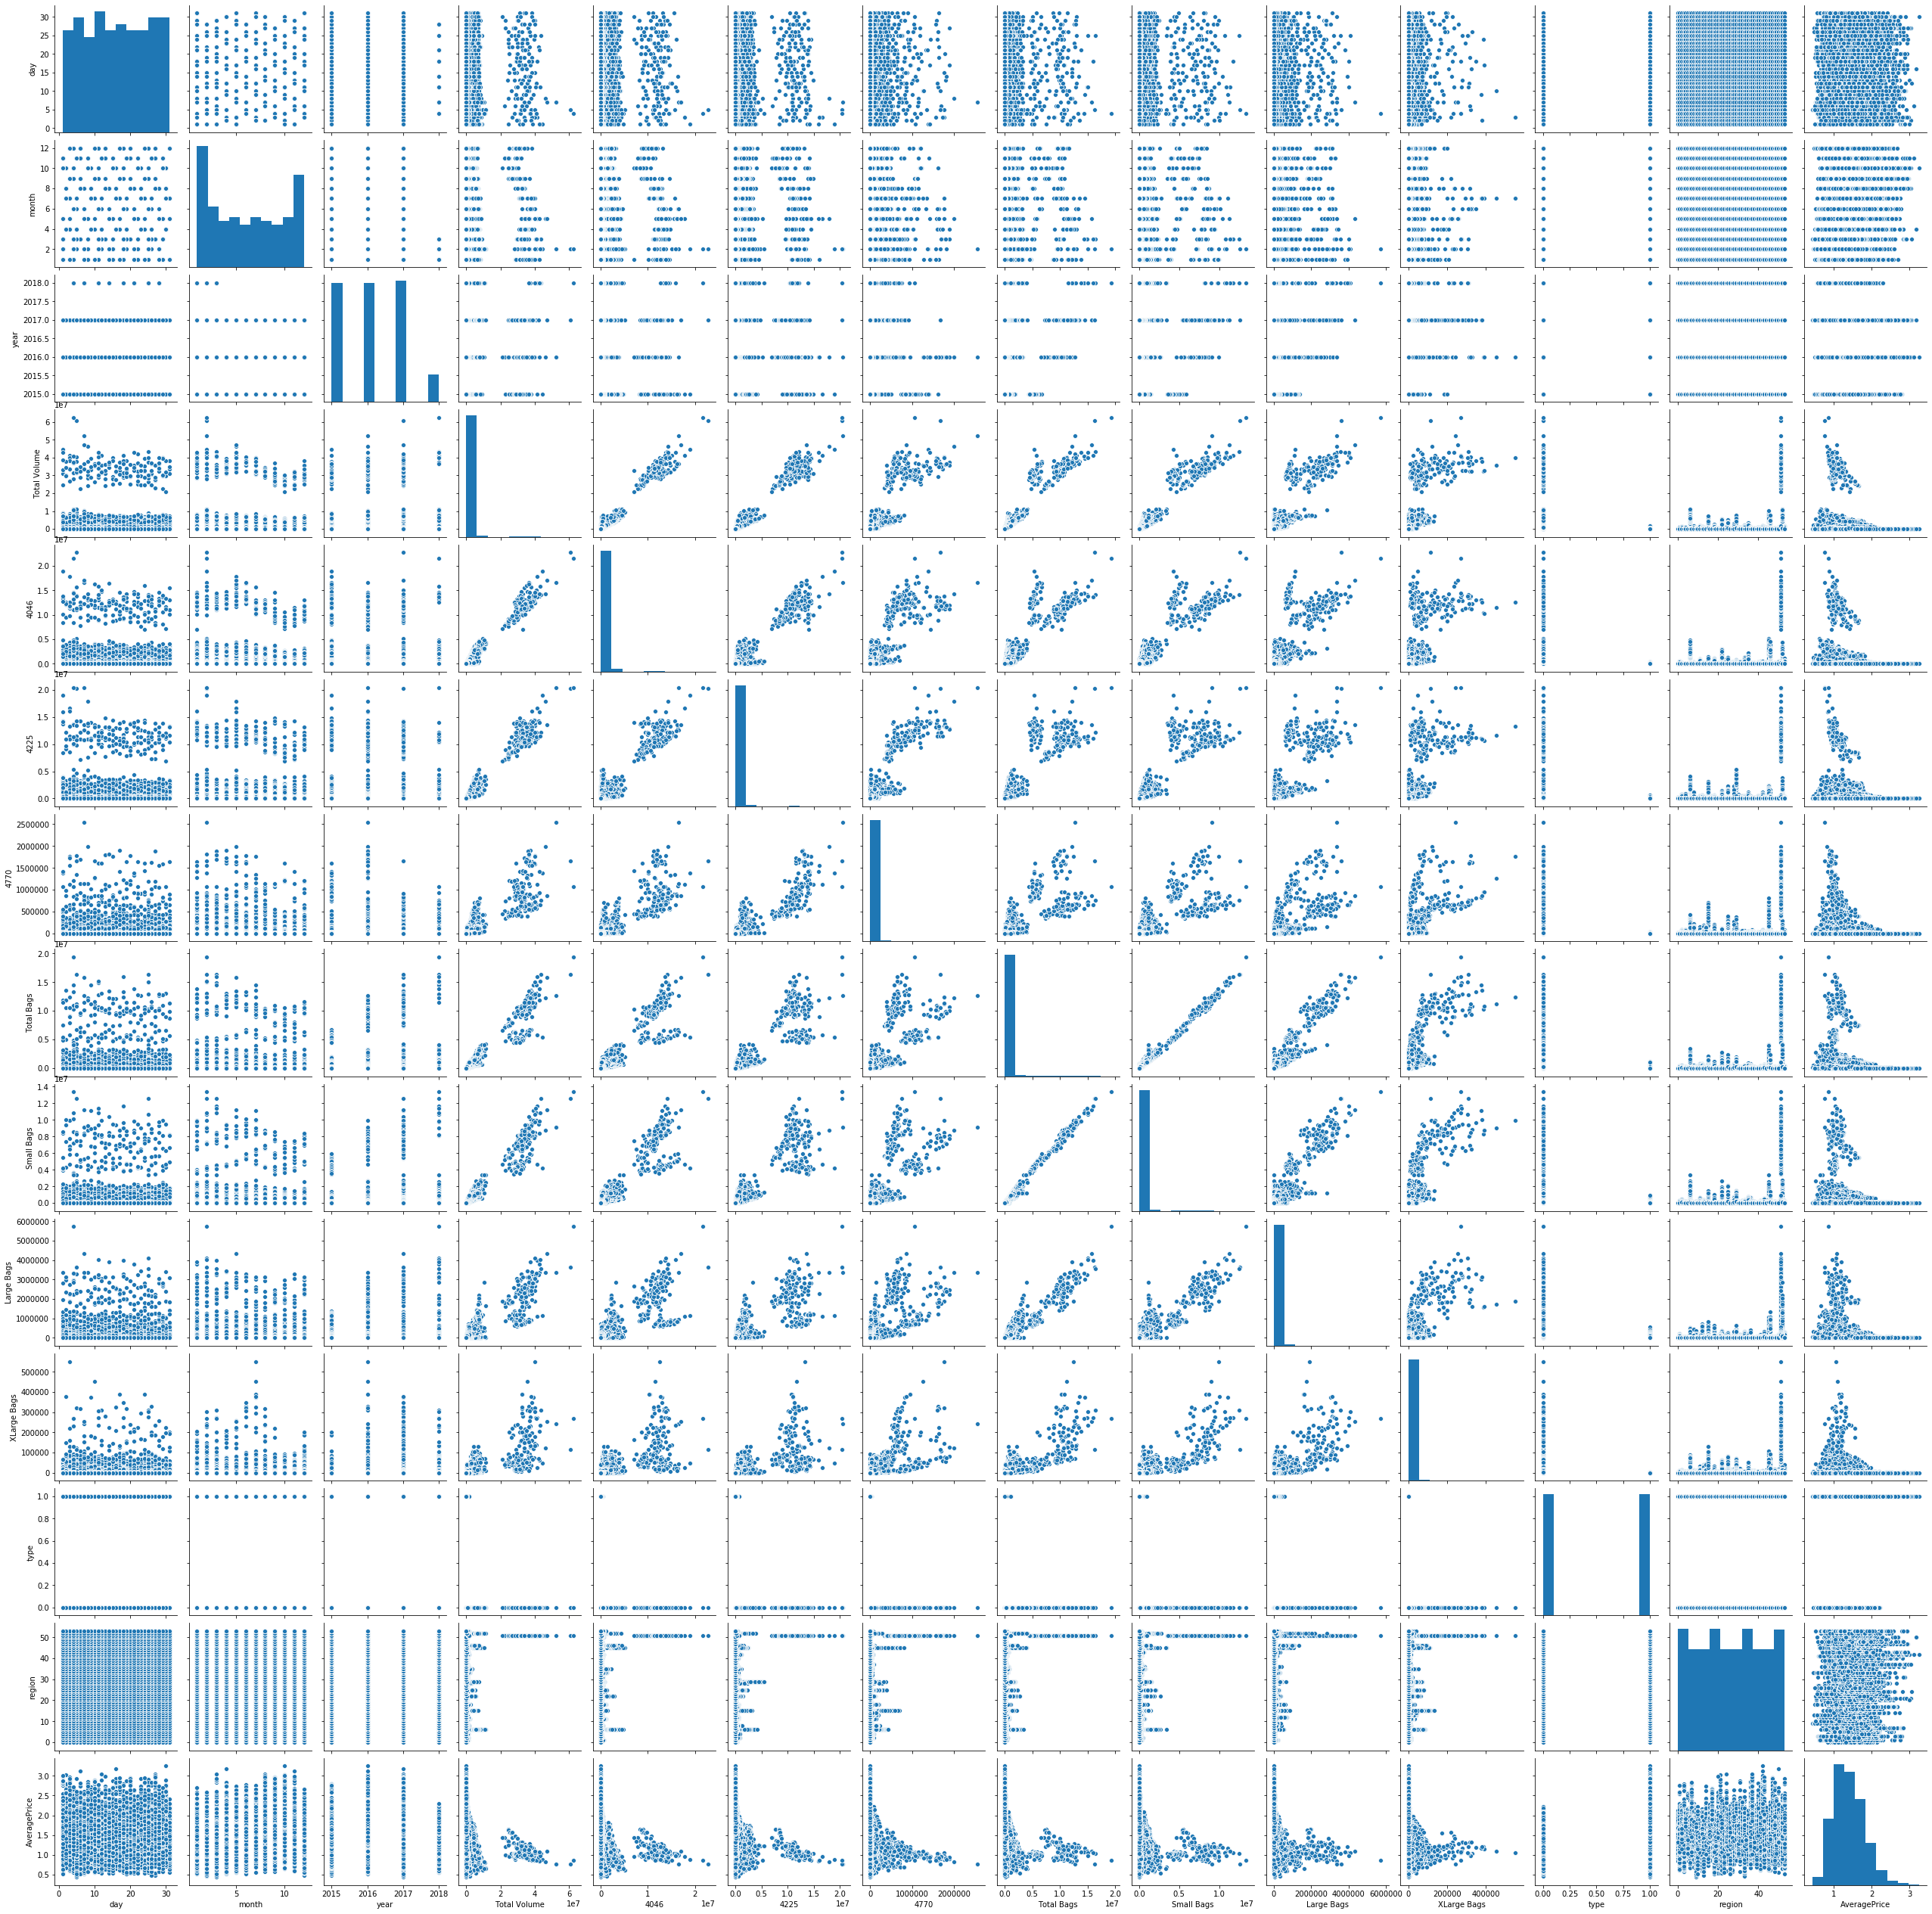

In [76]:
sns.pairplot(df_n)

OBSERVATION:

    1) We can see that from the above pair plot, less the volume of avocado higher the price, such relation can be see in various other columns as well. we can also see that 2016 and 2017 year's avocado are having higher prices, and 2018 year's avocado having least price.
    
    2) Organic type Avocado are the ones having higher Average price compared to Conventional type Avocado.
    

# Checking pair plot of correlation matrix:

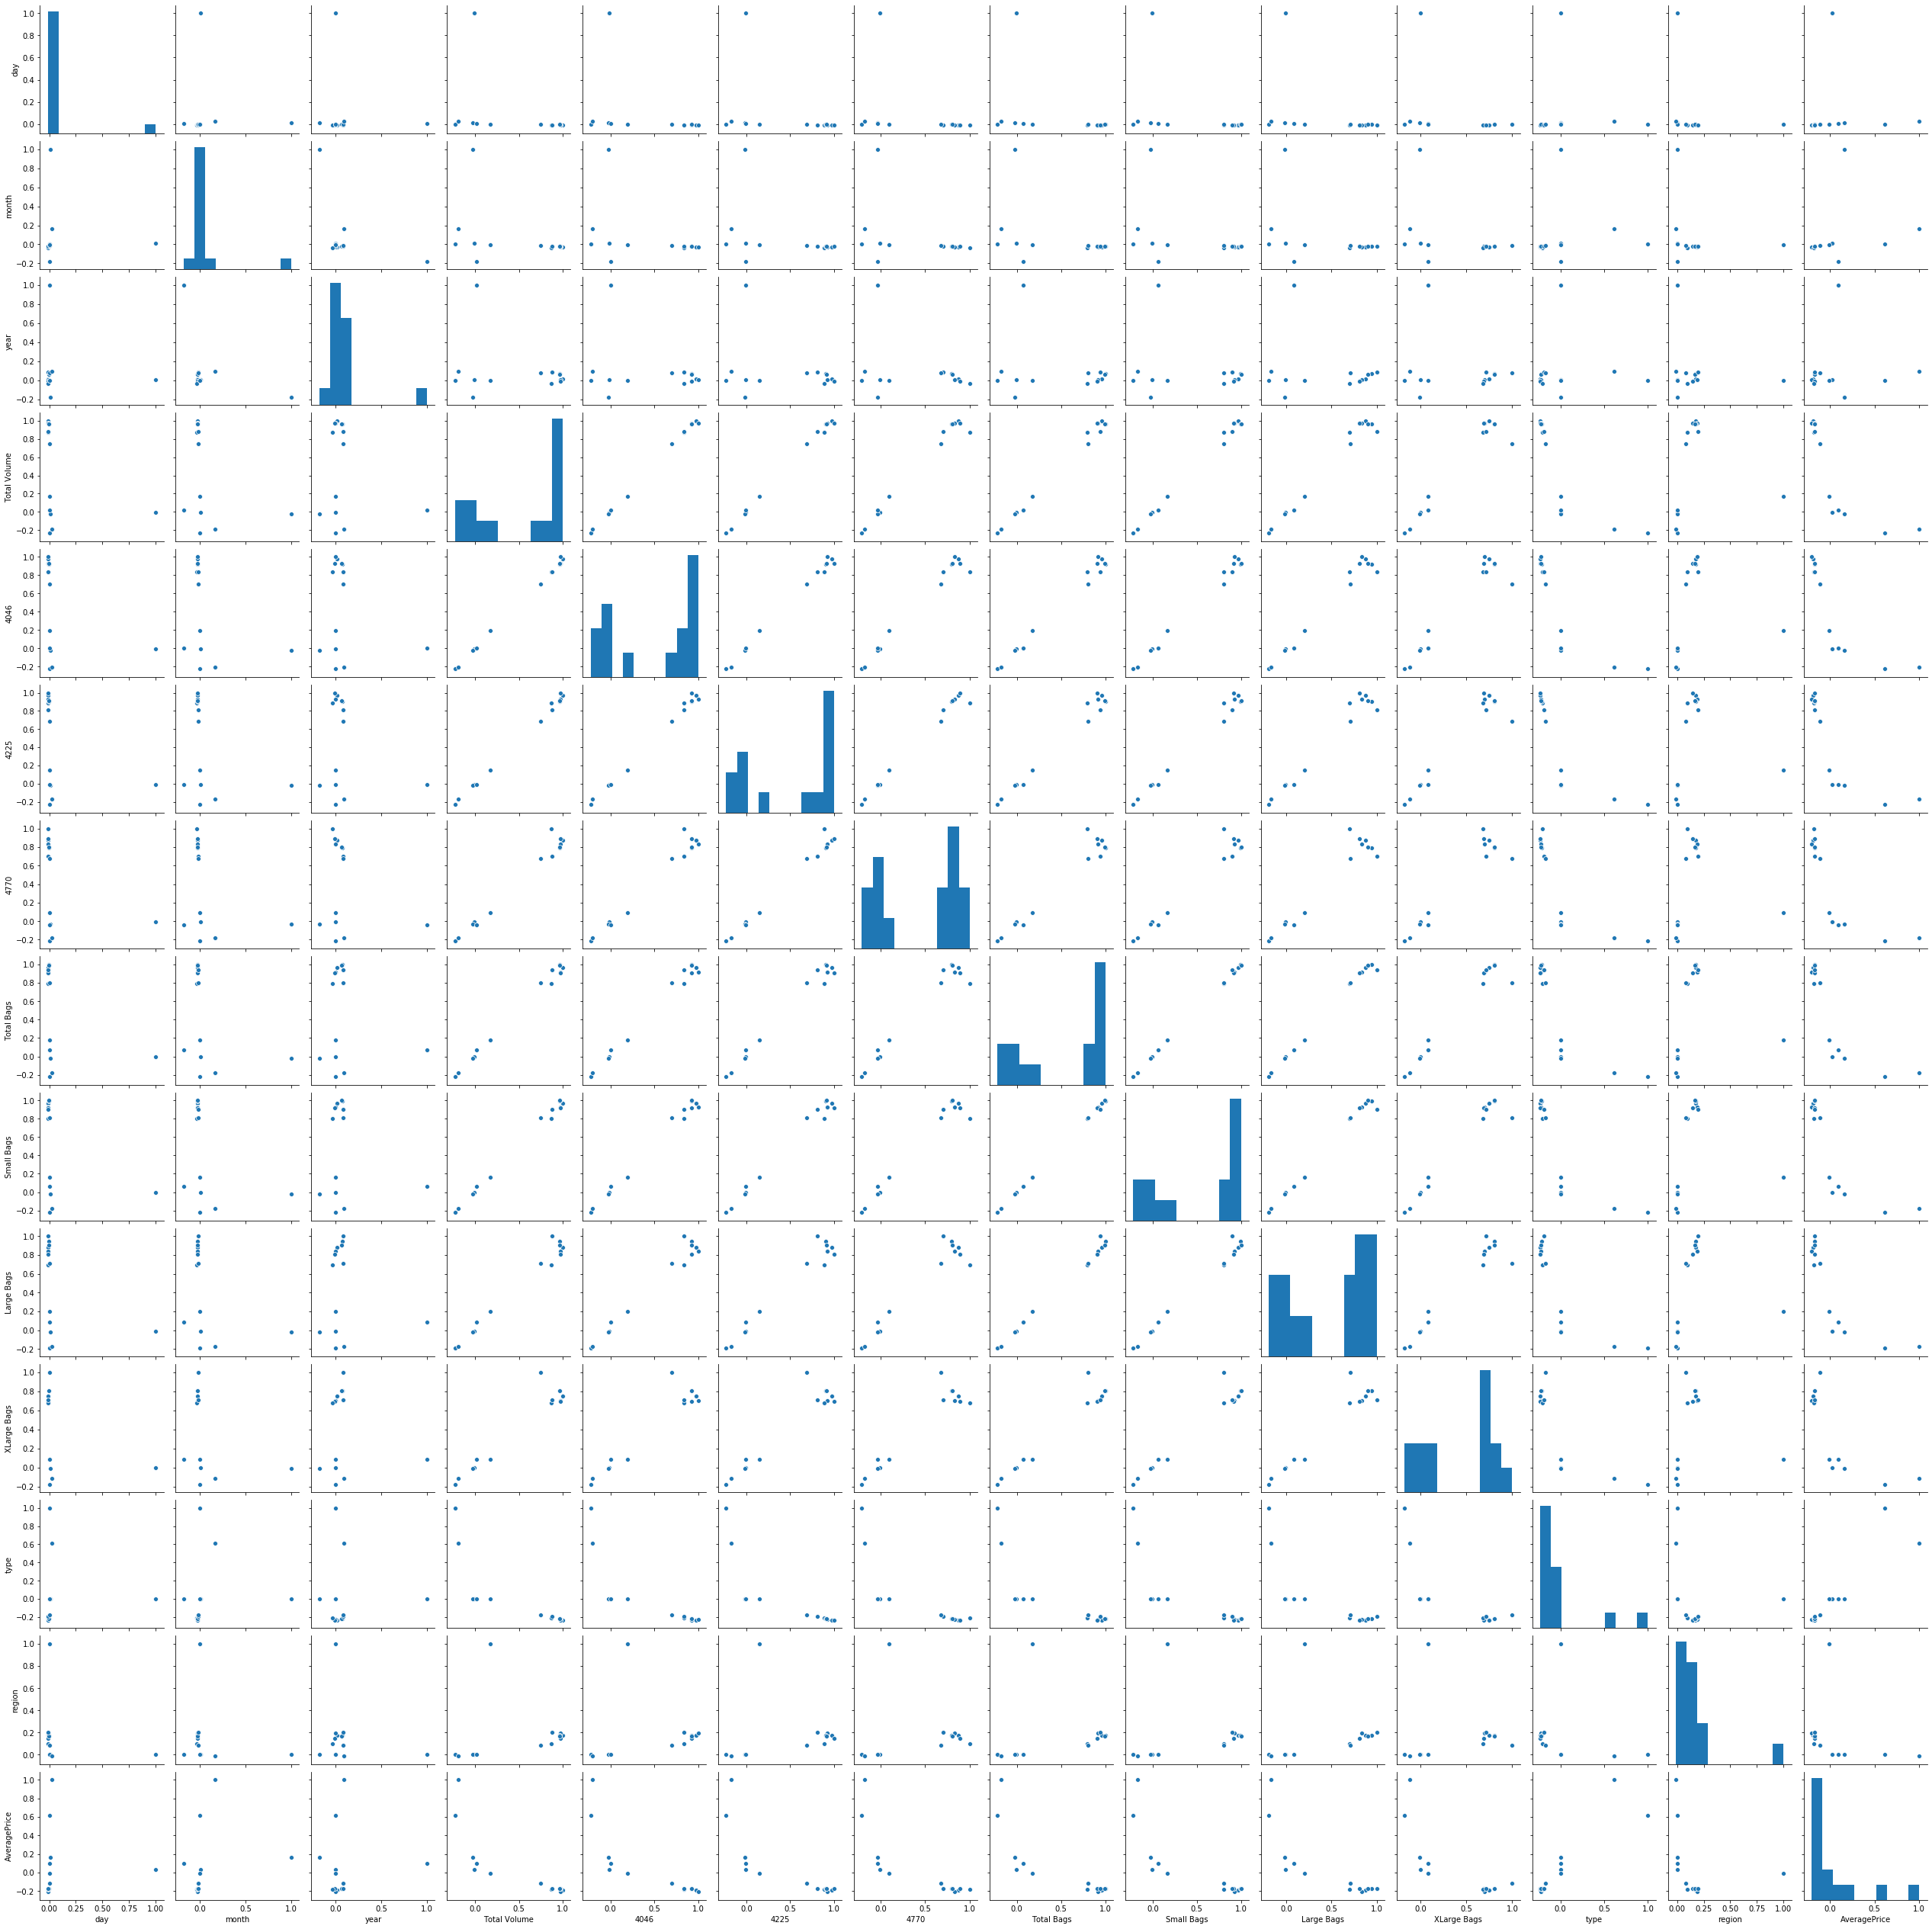

In [75]:
sns.pairplot(dfcor)

Observation:

Most of the columns are negatively correlated with the AveragePrice column like, TotalVolume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags.

In [19]:
# checking amount of skewness:
df_n.skew()

day              0.014310
month            0.106617
year             0.215339
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
AveragePrice     0.580303
dtype: float64

Observation: We can see the presence of skewness in the columns like Total Volume, 4046, 4225, 4770, TotalBags, SmallBags, LargeBags, XLarge Bags. 

# REMOVING OUTLIERS:

In [20]:
#Removing Outliers:
z=np.abs(zscore(df_n))
z

array([[1.29185687, 1.64763162, 1.22128204, ..., 0.99983562, 1.7002522 ,
        0.18868864],
       [0.49423066, 1.64763162, 1.22128204, ..., 0.99983562, 1.7002522 ,
        0.13901962],
       [0.30339555, 1.64763162, 1.22128204, ..., 0.99983562, 1.7002522 ,
        1.18206895],
       ...,
       [0.60817726, 1.46495942, 1.97050371, ..., 1.00016441, 1.70081131,
        1.15237477],
       [0.18944895, 1.46495942, 1.97050371, ..., 1.00016441, 1.70081131,
        1.30138182],
       [0.98707516, 1.46495942, 1.97050371, ..., 1.00016441, 1.70081131,
        0.53151208]])

In [21]:
threshold = 3
print(np.where(z>threshold))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([ 4,  4, 10, ..., 13, 13, 13], dtype=int64))


In [22]:
#creating new dataset without outliers and skewness
df_new = df_n[(z<3).all(axis=1)]
df_new

,day,month,year,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
0,27,12,2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,1.33
1,20,12,2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,1.35
2,13,12,2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0.93
3,6,12,2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,1.08
4,29,11,2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,2,2018,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,1.63
18245,28,1,2018,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,1.71
18246,21,1,2018,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,1.87
18247,14,1,2018,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,1.93


In [23]:
# checking skewness of new dataset:
df_new.skew()

day             0.011778
month           0.107408
year            0.229976
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
AveragePrice    0.377432
dtype: float64

OBSERVATION:
    We can say that skewness has been reduced drastically but not completely, if we try to remove complete skewness we'll loose huge amount of data.

# CHECKING DATALOSS:

In [24]:
# checking loss of the data after removing skewness.

print(((df_n.shape[0]-df_new.shape[0])/df_n.shape[0]*100))

3.276891884486821


OBSERVATION:
    After removing outliers, we have loosing 3.27 % of data which is very much in our limits.

In [25]:
# creating dataframe for algorithm modeling.

x = df_new.iloc[:,0:13]
y = df_new.iloc[:,-1]

In [26]:
x.shape

(17651, 13)

In [27]:
y.shape

(17651,)

In [28]:
x.columns

Index(['day', 'month', 'year', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

# SCALING THE DATASET:

In [29]:
sc = StandardScaler()
x= sc.fit_transform(x)
columnslist = ['day', 'month', 'year', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region']
X= pd.DataFrame(x, columns = columnslist)
X.head()

,day,month,year,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.289309,1.644612,-1.210013,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.695495
1,0.491652,1.644612,-1.210013,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.695495
2,-0.306004,1.644612,-1.210013,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.695495
3,-1.103660,1.644612,-1.210013,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.695495
4,1.517211,1.362113,-1.210013,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.695495


# CREATING TRAIN TEST DATASET:

In [30]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14120, 13)
(14120,)
(3531, 13)
(3531,)


# LINEAR REGRESSION METHOD:

In [31]:
# Linear Regression model making:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

# predicting x_test values
y_pred = lm.predict(x_test)
y_pred

linearRegression Coeffient [ 1.00069701e-02  6.74838399e-02  5.03184168e-02 -3.40481850e+01
  1.47302422e+01  1.34725720e+01  1.14574077e+00 -4.05738916e+03
  3.30864317e+03  1.05272291e+03  7.55689472e+01  2.25960235e-01
  4.54836018e-03]
linearRegression Intercept 1.4072803053095668
linearRegression score 0.4433994431904347


array([1.1574603 , 1.2512285 , 1.08924656, ..., 1.60778027, 1.29880844,
       1.25022714])

In [32]:
# calculating errors::


print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.22466970461630356
MEAN SQUARED ERROR:  0.08266360563174907
ROOT MEAN SQUARED ERROR:  0.28751279211845354


In [33]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, y_pred))

r2 Score of Linear Regression model: 

0.4403868037846056


Checking over fitting of the model using cross validation score:

In [34]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(lm, X, y, cv=cv1).mean())

0.44177018087611303


# LASSO RIDGE METHOD:

In [35]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.43374048897511497

Checking over fitting of the model using cross validation score:

In [36]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(ls, X, y, cv=cv1).mean())

0.4325507201960711


In [37]:
rd = Ridge(alpha= 0.01)

rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.4433703101654407

Checking over fitting of the model using cross validation score:

In [38]:
print(cross_val_score(rd, X, y, cv=cv1).mean())

0.4415209568787989


# ELASTIC NET METHOD:

In [39]:
# elasticNet is a combination of both lasso and ridge algorithms

from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha= 0.01)

enr.fit(x_train, y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train, y_train))
enr.coef_

0.43954115776834


array([ 0.00457468,  0.06087174,  0.04308801, -0.        , -0.04643249,
        0.02288727, -0.        , -0.        , -0.        , -0.02702643,
        0.00652338,  0.21832411,  0.        ])

In [40]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.22518773640875497
MEAN SQUARED ERROR:  0.08320301449086877
ROOT MEAN SQUARED ERROR:  0.28844932742315205


Checking over fitting of the model using cross validation score:

In [41]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(enr, X, y, cv=cv1).mean())

0.4377406174179003


# SUPPORT VECTOR REGRESSOR:

In [42]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.4415291866532316

kernel : poly
0.5407329731602166

kernel : rbf
0.6406931335180828


In [43]:
sv_rbf = SVR('rbf')
sv_rbf.fit(x_train, y_train)
print(sv_rbf.score(x_train, y_train))

0.6406931335180828


In [44]:
sv_rbf_pred_y = sv_rbf.predict(x_test)

In [45]:
# checking errors:

print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, sv_rbf_pred_y))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, sv_rbf_pred_y))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, sv_rbf_pred_y)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.17244167457435128
MEAN SQUARED ERROR:  0.054595201507216216
ROOT MEAN SQUARED ERROR:  0.23365616085867758


In [46]:
# checking r2 score error of support vector regressor linear model

print(r2_score(y_test, sv_rbf_pred_y))

0.6304033077194684


Checking over fitting of the model using cross validation score:

In [47]:
cv1 = KFold(n_splits=10, shuffle=True)


print(cross_val_score(sv_rbf, X, y, cv=cv1).mean())

0.6317432786423289


# DECISION TREE REGRESSOR:

In [48]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

1.0


In [49]:
y_pred = dtr.predict(x_test)
y_pred

array([1.4 , 1.76, 1.17, ..., 2.31, 1.49, 1.14])

In [50]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.12370150099122061
MEAN SQUARED ERROR:  0.0354380911922968
ROOT MEAN SQUARED ERROR:  0.1882500762079442


Checking over fitting of the model using cross validation score:

In [51]:
from sklearn.model_selection import cross_val_score
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(dtr, X, y, cv=cv1).mean())

0.764163643575768


# RANDOM FOREST REGRESSOR:

In [52]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [53]:
print(rf.score(x_train, y_train))

0.9839102207558459


In [54]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.08960402152364767
MEAN SQUARED ERROR:  0.015883100368167653
ROOT MEAN SQUARED ERROR:  0.12602817291450216


Checking over fitting of the model using cross validation score:

In [55]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, X, y, cv=cv1).mean())

0.8934220131329391


# ADA BOOST REGRESSOR METHOD:

In [56]:
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.5817977870833139


In [57]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.20538805596516152
MEAN SQUARED ERROR:  0.06430966395122854
ROOT MEAN SQUARED ERROR:  0.2535935013978642


Checking over fitting of the model using cross validation score:

In [58]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, X, y, cv= cv1).mean())

0.5587837376009553


# OBSERVATION:

OBSERVATION:
    By comparing accuracy score of every model and their cross validation score, we found out that Support vector regressor model is our best fit model having higher accuracy and less over fitting and its errors is also less.

In [59]:
sv_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# HYPER PARAMETER TUNING:

In [60]:
# using multiple parameters:

parameters = {'kernel' : ['linear','rbf'],
              'gamma' : ['scale','auto'],
              }


In [61]:
gs_svr = GridSearchCV(SVR(), parameters, cv = 5)

In [62]:
gs_svr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [63]:
gs_svr.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

# FINAL MODEL MAKING:

In [64]:
# using best parameters for tuning the model.

sv_rbf_f = SVR(kernel = 'rbf', gamma = 'scale')
sv_rbf_f.fit(x_train, y_train)





SVR()

In [65]:
print(sv_rbf_f.score(x_train, y_train))

0.6406931335180828


ACCURACY SCORE OF OUR FINAL MODEL IS 64.06 %.

OBSERVATION: By hyper tuning also our accuracy score remains the same.

In [66]:
svrbfpred_f=sv_rbf_f.predict(x_test)

In [68]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, svrbfpred_f))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, svrbfpred_f))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, svrbfpred_f)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.17244167457435128
MEAN SQUARED ERROR:  0.054595201507216216
ROOT MEAN SQUARED ERROR:  0.23365616085867758


R2 Score of final model:

In [69]:
print(r2_score(y_test, svrbfpred_f))

0.6304033077194684


Checking over fitting of the model using cross validation score:

In [71]:
cv1 = KFold(n_splits=10, shuffle=True)
print(cross_val_score(sv_rbf_f, X, y, cv=cv1).mean())

0.6321372209562397


# SAVING THE MODEL:

In [72]:
import joblib
joblib.dump(sv_rbf_f, 'Vaibhav_avocado_project_model.pkl')

['Vaibhav_avocado_project_model.pkl']

# RELOADING THE MODEL:

In [74]:
#Reloading the model and predicting the dataset.
SVR_Vaibhav_Avocado_project_model = joblib.load('Vaibhav_avocado_project_model.pkl')
SVR_Vaibhav_Avocado_project_model.predict(x_train)

array([1.53368252, 1.09135089, 1.10995258, ..., 1.68911171, 1.09725828,
       1.50923308])

# CONCLUSION:

ACCURACY SCORE OF OUR FINAL MODEL IS 64.06 %.  

# THANK YOU